In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import a dataset from a csv file using pandas
dframe = pd.read_csv('insurance.csv')

In [3]:
# shape and display dataset sample rows

dframe.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The insurrance dataset has 1338 entries and a total of 7 columns.

In [5]:
# classify columns into categorical and quantitative variables

def check_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [6]:
cat_cols, quan_cols = check_variables(dframe)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['region', 'smoker', 'sex']
quantitative columns: ['children', 'age', 'charges', 'bmi']


# Categorical variables data

In [7]:
# describe one categorical variable from data frame
cat_var = dframe[['smoker', 'region', 'sex']]
cat_var.head()

,smoker,region,sex
0,yes,southwest,female
1,no,southeast,male
2,no,southeast,male
3,no,northwest,male
4,no,northwest,male


In [8]:
# plot Pie chart for a categorical variable (‘sex’) from data frame
# create a veriable to store sex group by

sex_df = cat_var.groupby('sex').size()
smoker_df = cat_var.groupby('smoker').size()
region_df = cat_var.groupby('region').size()

In [9]:
# count values for frequency distribution of a categorical variable (‘sex’)
def frequency(name):
    frequency = cat_var[name].value_counts().rename_axis('Category').reset_index(name='counts')
    frequency['Percent'] = np.round((frequency['counts']/frequency['counts'].sum()) * 100, 2) # new column with percentage
    fd_row = {'Category': 'Total', 'counts': frequency['counts'].sum(), 'Percent': frequency['Percent'].sum()} # new row with total
    frequency = frequency.append(fd_row, ignore_index=True)
    return frequency

In [10]:
# Practicing with OOP classs object
class Charts():
    
    def __init__(self, data):
        self.data = data
    
 # plot Pie and histogram chart for a categorical variable (‘smoker’) from data frame  
    def pie_plot(self, kind = "pie" , label = 'label'):
        return self.data.plot(kind = kind, ylabel = label, autopct = '%.2f%%' )
    
    def bar_plot(self, kind = 'bar'):
        return self.data.plot(kind = kind, rot = 0, colormap = 'Paired')

##### SEX

In [11]:
sex = Charts(data=sex_df)

In [12]:
frequency('sex')

,Category,counts,Percent
0,male,676,50.52
1,female,662,49.48
2,Total,1338,100.00


<AxesSubplot:ylabel='Sex'>

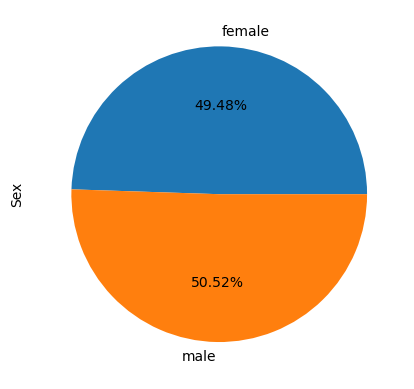

In [13]:
sex.pie_plot(label='Sex')

<AxesSubplot:xlabel='sex'>

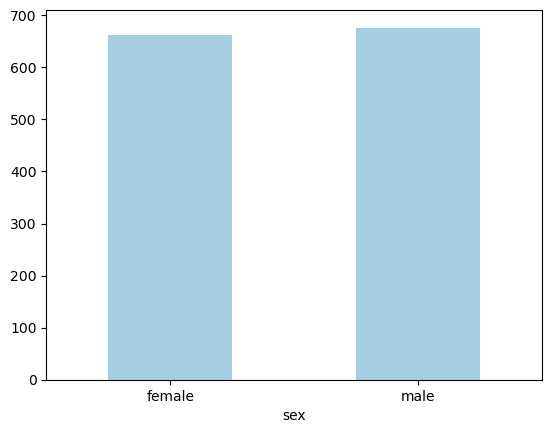

In [14]:
sex.bar_plot()

The total share of male is 50.52% while female is 49.48%. The bar chart shows a uniform distribution of the dataset.

##### SMOKER

In [15]:
# SMOKER
cati = Charts(data=smoker_df)

In [16]:
frequency('smoker')

,Category,counts,Percent
0,no,1064,79.52
1,yes,274,20.48
2,Total,1338,100.00


<AxesSubplot:ylabel='smoker'>

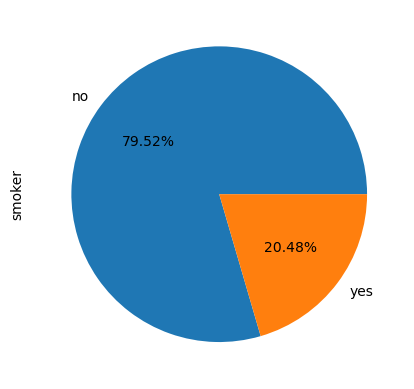

In [17]:
cati.pie_plot(label='smoker')

<AxesSubplot:xlabel='smoker'>

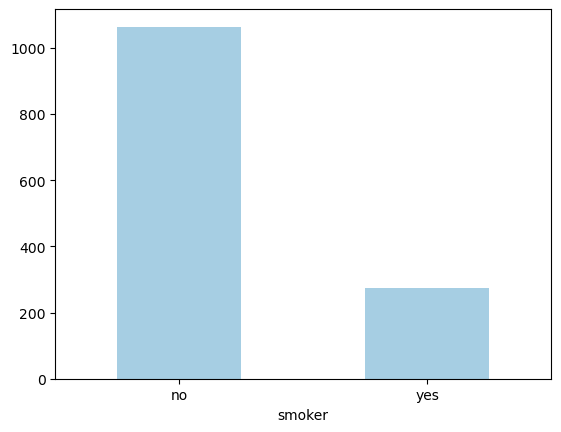

In [18]:
cati.bar_plot()

The charts above shows that out of a total of 1338 people in the dataset about 79.5% do not smoke while 20.5% are smoker. 

##### REGION

In [19]:
# REGION
region = Charts(data=region_df)

In [20]:
frequency('region')

,Category,counts,Percent
0,southeast,364,27.20
1,southwest,325,24.29
2,northwest,325,24.29
3,northeast,324,24.22
4,Total,1338,100.00


<AxesSubplot:ylabel='Region'>

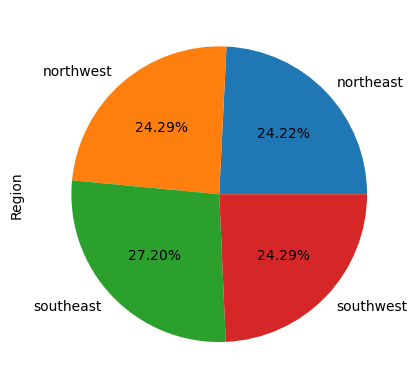

In [21]:
region.pie_plot(label='Region')

<AxesSubplot:xlabel='region'>

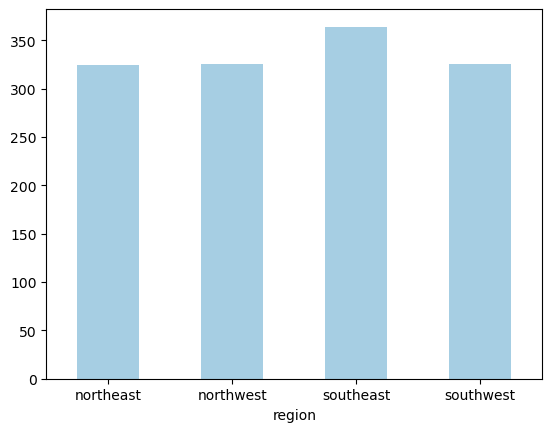

In [22]:
region.bar_plot()

The charts above shows how the 3 regions have equal share of 24%. southeast seems to standout with a 27% share.

# Quantitative variables data

In [23]:
# describe one quantitative variable (‘age’) from data frame
quant = dframe[['age', 'bmi', 'children', 'charges']]
quant.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [24]:
quant.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
# Practicing with OOP classs object
class QuantVar():
    
    def __init__(self, data):
        self.data = data
    
    # Age measures of center 
    def measure(self, col = 'name'):
        moc = pd.DataFrame({'Mode': self.data[col].mode(), 'Mean': self.data[col].mean(), 'Median': self.data[col].median()}).round(3)
        moc= moc.transpose()
        return moc
    
    def spread(self, col = 'name' ):
        Q25 = self.data[col].quantile(0.25)
        Q75 = self.data[col].quantile(0.75)
        IQR = Q75 - Q25
        print('IQR value: ',IQR)
        print('STD :', np.round(self.data[col].std(), 3))
        outliers = self.data[(self.data[col] < Q25 - 1.5*IQR) | (self.data[col] > Q75 + 1.5*IQR)][col]
    
        print('Outliers: \n',outliers)
        
    def box_plot(self, col = 'name', label = 'label'):
        plt.boxplot(x=self.data[col], labels=[col])
        plt.ylabel(label)
    
    def hist(self, col = 'name',label = 'label'):
        plt.hist(self.data[col], bins = 20, histtype='bar')
        plt.xlabel(label)
        plt.ylabel('Count')
        plt.show()

In [26]:
Quantitative_variables = QuantVar(quant)

### Variable: AGE

In [27]:
Quantitative_variables.measure('age')

,0
Mode,18.000
Mean,39.207
Median,39.000


In [28]:
Quantitative_variables.spread('age')

IQR value:  24.0
STD : 14.05
Outliers: 
 Series([], Name: age, dtype: int64)


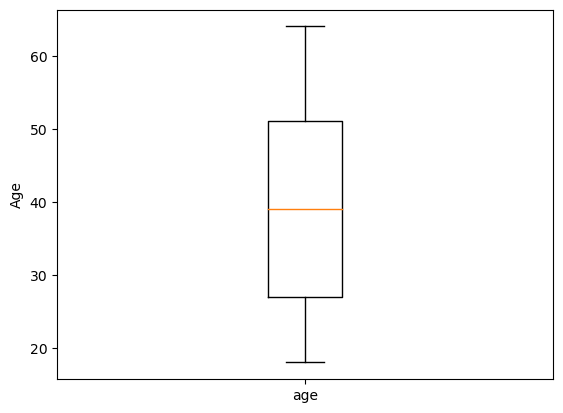

In [29]:
Quantitative_variables.box_plot('age', 'Age')

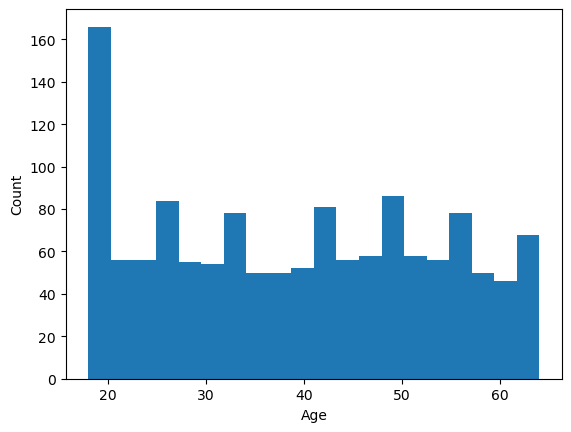

In [30]:
Quantitative_variables.hist('age', 'Age')

The average age of the people with insurrance are 39 years old and it's also the midpoint of the datasets. The Majority of the people with insurrance are around the age of 18 years old. This is also reflected in the histogram. The histogram is a multimodal since it has two modes.

### Variable: BMI

In [31]:
Quantitative_variables.measure('bmi')

,0
Mode,32.300
Mean,30.663
Median,30.400


In [32]:
Quantitative_variables.spread('bmi')

IQR value:  8.3975
STD : 6.098
Outliers: 
 116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64


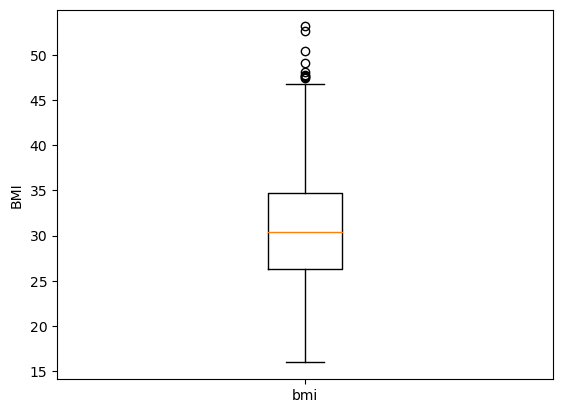

In [33]:
Quantitative_variables.box_plot('bmi', 'BMI')

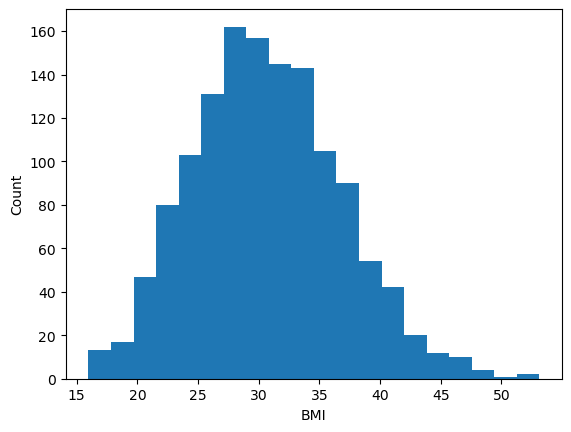

In [34]:
Quantitative_variables.hist('bmi', 'BMI')

The BMI distribution is skewed right.  It shows that insurrance is majorly given to people with low bmi, as compare to people with high bmi. 

The data seem to be centered around people with 30 - 32 bmi. This further explains why the histogram is skewed rightward. The insurrance dataset range between 20 to 60, which is approximate 40 range.

There are probably 9 outliers ranging from 47 to 53 towards the left side. 

### Variable: CHILDREN

In [35]:
Quantitative_variables.measure('children')

,0
Mode,0.000
Mean,1.095
Median,1.000


In [36]:
Quantitative_variables.spread('children')

IQR value:  2.0
STD : 1.205
Outliers: 
 Series([], Name: children, dtype: int64)


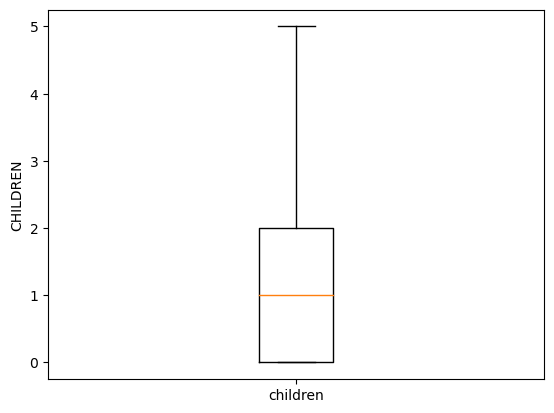

In [37]:
Quantitative_variables.box_plot('children', 'CHILDREN')

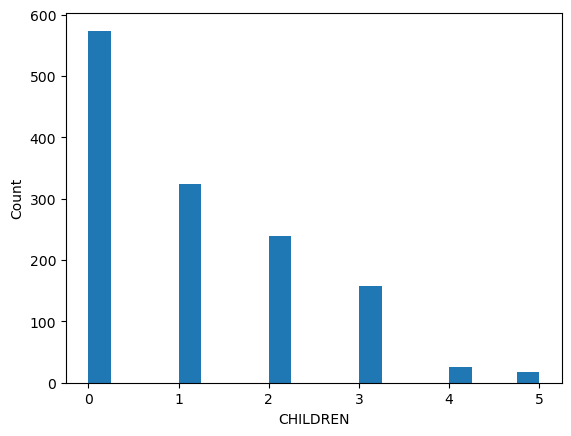

In [38]:
Quantitative_variables.hist('children', 'CHILDREN')

The number of children in histogram is skewed to the right.  It indicates that the major of the people in the dataset do not have children. 

The data seem to be centered around people those 1 child. This further explains why the histogram is skewed rightward. There are no outliers.

### Variable: CHARGES

In [39]:
Quantitative_variables.measure('charges')

,0
Mode,1639.563
Mean,13270.422
Median,9382.033


In [40]:
Quantitative_variables.spread('charges')

IQR value:  11899.625365
STD : 12110.011
Outliers: 
 14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64


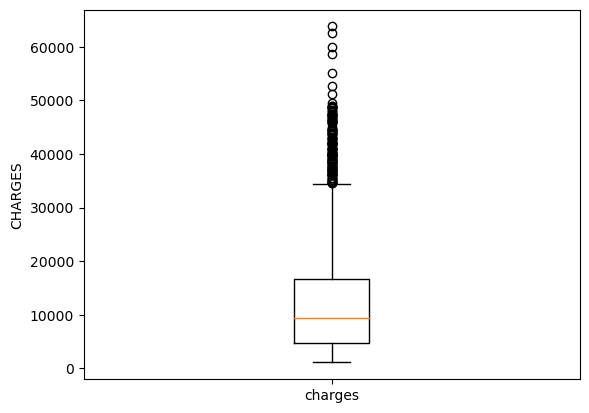

In [41]:
Quantitative_variables.box_plot('charges', 'CHARGES')

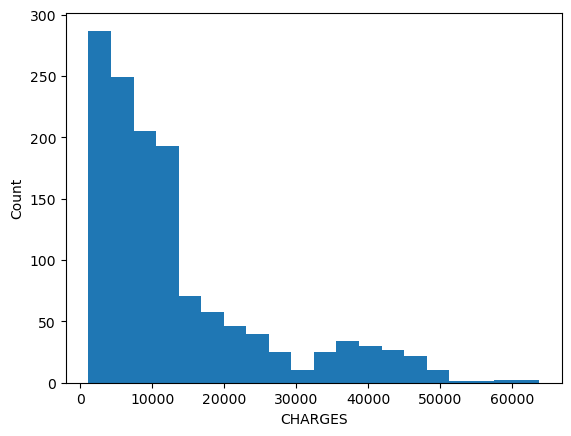

In [42]:
Quantitative_variables.hist('charges', 'CHARGES')

This variable is a depend variable. And it's skewed rightward with lots out outliers affecting the dataset.